# COGS 108 - Final Project (change this to your project's title)

# Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [  ] YES - make available
* [  ] NO - keep private

# Names

- Yuxiang Hong
- Claire Gao
- Milo Li
- Erin Li
- Xinyi Zhang

# Abstract

Please write one to four paragraphs that describe a very brief overview of why you did this, how you did, and the major findings and conclusions.

# Research Question

How do variations in theta and beta EEG frequency band activity correlate with levels of student-reported confusion when viewing educational videos of differing complexity, and to what extent can these EEG patterns be used to predict confusion states in real time?



## Background and Prior Work

The rapid development of online education, particularly through Massive Open Online Courses (MOOCs), has opened up more opportunities for students worldwide to access a diverse range of study resources. However, unlike traditional classrooms that facilitate active interactions between instructors and students, online learning often lacks immediate feedback mechanisms. This limitation can make it difficult to identify and address moments of student confusion, which can hinder comprehension and motivation if left unresolved.

To tackle this issue, recent research has explored the use of electroencephalography (EEG) technology to detect cognitive states such as confusion in online learning environments. In the paper Using EEG to Improve Massive Open Online Courses Feedback Interaction, Wang et al. conducted a pilot study investigating the potential of EEG-based methods for identifying confusion among students while viewing MOOC videos. During the study, EEG data was collected from students as they watched video clips designed to evoke varying levels of comprehension—from basic topics assumed to be clear for college students (e.g., introductory algebra) to more complex subjects (e.g., quantum mechanics and stem cell research). Using a single-channel EEG device, the researchers captured data on brain activity from the frontal lobe, a region associated with cognitive processing and emotional response. Afterward, students self-reported their confusion levels on a scale from 1 (least confusing) to 7 (most confusing), generating both predefined and self-reported labels of confusion. By training machine learning classifiers on the EEG data, the researchers demonstrated a moderate ability to distinguish between confusing and non-confusing experiences, achieving accuracies that, while limited, were above random chance and comparable to human observers interpreting student body language.1 These findings suggest the feasibility of EEG technology as a tool for detecting confusion in educational settings, which could support more adaptive and responsive online learning environments.

Our project builds upon Wang et al.'s foundational work by applying EEG data analysis to further understand and classify confusion states in students. Similar to their study design, we utilize a dataset containing EEG data collected from 10 college students while they engage with educational video clips that range from basic to complex topics. We analyze the average EEG signals with higher frequency data over every 0.5 seconds as students watch these videos, alongside their self-reported confusion ratings.

Based on provious works, different brain wave frequencies are associated with different cognitive states (Kaushik et al).

Theta Waves (4–8 Hz): Theta waves are often associated with memory formation, learning, and attention. Alpha Waves (8–13 Hz): Alpha waves are most commonly linked to relaxation and reduced attentional demands. Beta Waves (13–28 Hz): Beta waves are generally associated with active cognitive processing and engagement in problem-solving tasks.2 Therefore, By monitoring shifts in these frequency bands, we could potentially predict instances of confusion in real time, enabling insights into how students process and react to different educational stimuli.

By analyzing this EEG recording data, our project aims to use students’ confusion score ratings to build machine learning models that accurately classify instances of student confusion. The insights gained could support the future development of applications in online education, such as real-time adaptive learning systems that adjust content based on student engagement and cognitive load. Ultimately, this project seeks to contribute to a more personalized and effective online learning experience, utilizing EEG data to bridge the feedback gap inherent in remote education.

1. <a name="cite_note-1"></a> [^](#cite_ref-1) Wang, H., Li, Y., Hu, X., Yang, Y., Meng, Z., & Chang, K. M. (2013, June). Using EEG to Improve Massive Open Online Courses Feedback Interaction. [Link to paper](https://www.cs.cmu.edu/~kkchang/paper/WangEtAl.2013.AIED.EEG-MOOC.pdf)
2. <a name="cite_note-2"></a> [^](#cite_ref-2) Kaushik, P., Moye, A., Vugt, M.v. et al. Decoding the cognitive states of attention and distraction in a real-life setting using EEG. Sci Rep 12, 20649 (2022). [Link to paper](https://doi.org/10.1038/s41598-022-24417-w)

# Hypothesis


We hypothesize that by recording EEG data while students watch lecture videos, we can predict moments of confusion. Specifically, we predict that beta (12-29 Hz) and gamma (30-100 Hz) band activity will increase as confusion intensifies, with a 20% or greater rise in power from baseline levels during moments of high cognitive load. This increase will enable us to classify confusion instances accurately. We expect beta waves to correlate with heightened cognitive engagement, as students attempt to process complex information, while gamma activity may reflect the effort involved in integrating and making sense of new content. To quantify these changes, we will measure the percent change in power across these bands and establish a threshold (e.g., 0.5 correlation coefficient) for significant associations with confusion scores. We will use statistical tests (e.g., t-tests) to confirm that the observed increases differ significantly from baseline and conduct a classification analysis to determine the predictive accuracy of EEG patterns in identifying confusion states.

# Data

## Data overview

For each dataset include the following information
- Dataset #1
  - Dataset Name: Confused student EEG brainwave data
  - Link to the dataset: https://www.kaggle.com/datasets/wanghaohan/confused-eeg/data
  - Number of observations: 100
  - Number of variables: 10
- Dataset #2 (if you have more than one!)
  - Dataset Name: Demographic data
  - Link to the dataset: https://www.kaggle.com/datasets/wanghaohan/confused-eeg/data
  - Number of observations: 10
  - Number of variables: 3

EEG Data (EEG_confused.csv): This dataset contains electroencephalography (EEG) readings for various subjects while they watched different educational videos, identified by the VideoID variable. Important variables include Attention, Meditation, Raw, Delta, Theta, Alpha1, Alpha2, Beta1, Beta2, Gamma1, and Gamma2, which represent metrics of brainwave activity in different frequency bands. These metrics are proxies for cognitive states, with frequencies like Theta and Beta potentially indicating levels of focus or confusion. The variable we try to predict is user-definedlabeln, which represents confusion level, 1 is confused and 0 is not confused. Data types include floats. Preprocessing steps might involve handling missing values, normalizing EEG signals, and converting categorical columns from float to integer data types for model input.

Demographic Data (demographic_info.csv): This dataset likely includes demographic information for each participant, which may include variables such as SubjectID, Age, Gender, Education Level, and potentially additional personal or socioeconomic characteristics. These variables provide context for individual differences in cognitive responses, with Age and Education Level possibly affecting EEG outcomes or interpretations. Data types are likely to be a mix of integers (for IDs and age), categorical (for gender and education level), and strings or floats for other characteristics. Preprocessing would involve cleaning categorical data, encoding categorical variables as needed, and ensuring IDs match those in the EEG dataset for accurate merging.

We plan to merge these two datasets into a single dataframe with inner merge on SubjectID.

## Dataset #1 (use name instead of number here)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
%matplotlib inline

In [3]:
## YOUR CODE TO LOAD/CLEAN/TIDY/WRANGLE THE DATA GOES HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION 
data= pd.read_csv("project_data/EEG_data.csv") # Need to change the path to "COGS 108/project_data/EEG_data.csv" in github
file_names = {
    0: 'physics_0.m4v',
    1: 'calculus_1.m4v',
    2: 'calculus_2.m4v',
    3: 'alegbra_3.m4v',
    4: 'alegbra_4.m4v',
    5: 'physics_5.m4v',
    6: 'Stem_Cell_6.m4v',
    7: 'analog_signals.m4v',
    8: 'digital_signals.m4v',
    9: 'audio_signals.m4v'
}
data['VideoID'] = data['VideoID'].map(file_names)
data.to_csv("EEG_confused.csv",index=False)
data.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0.0,physics_0.m4v,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0
1,0.0,physics_0.m4v,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0
2,0.0,physics_0.m4v,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0
3,0.0,physics_0.m4v,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0
4,0.0,physics_0.m4v,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0


In [4]:
eeg_df = pd.read_csv("EEG_confused.csv") # Need to change the path to "COGS 108/project_data/EEG_confused.csv" in github
eeg_df.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0.0,physics_0.m4v,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0
1,0.0,physics_0.m4v,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0
2,0.0,physics_0.m4v,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0
3,0.0,physics_0.m4v,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0
4,0.0,physics_0.m4v,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0


We convert SubjectID, predefinedlabel, and user-definedlabeln to integer, since they are in fact integers but presented as floats.

In [5]:
eeg_df['SubjectID'] = eeg_df['SubjectID'].astype(int)
eeg_df['predefinedlabel'] = eeg_df['predefinedlabel'].astype(int)
eeg_df['user-definedlabeln'] = eeg_df['user-definedlabeln'].astype(int)
eeg_df.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0,physics_0.m4v,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0,0
1,0,physics_0.m4v,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0,0
2,0,physics_0.m4v,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0,0
3,0,physics_0.m4v,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0,0
4,0,physics_0.m4v,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0,0


We renamed user-definedlabeln to "confused" where 1 is confused, 0 is not confused

In [6]:
eeg_df = eeg_df.rename(columns = {'user-definedlabeln': 'confused'})

## Demographic data

We renamed the column 'subject ID' to 'SubjectID' to match the EEG data

In [7]:
demo_df = pd.read_csv("project_data/demographic_info.csv") # Need to change the path to "COGS 108/project_data/demographic_info.csv" in github
demo_df = demo_df.rename(columns = {'subject ID': 'SubjectID'})
demo_df.head()

,SubjectID,age,ethnicity,gender
0,0,25,Han Chinese,M
1,1,24,Han Chinese,M
2,2,31,English,M
3,3,28,Han Chinese,F
4,4,24,Bengali,M


Merging the two dataset on SubjectId We merge the EEG data with demographic data based on the SubjectID column to enrich the dataset with additional features.

In [8]:
df = eeg_df.merge(demo_df,how = 'inner',on = 'SubjectID')
# Strip whitespace from column names
df.columns = df.columns.str.strip()
df.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,confused,age,ethnicity,gender
0,0,physics_0.m4v,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0,0,25,Han Chinese,M
1,0,physics_0.m4v,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0,0,25,Han Chinese,M
2,0,physics_0.m4v,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0,0,25,Han Chinese,M
3,0,physics_0.m4v,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0,0,25,Han Chinese,M
4,0,physics_0.m4v,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0,0,25,Han Chinese,M


In [9]:
df.describe()

,SubjectID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,confused,age
count,12811.000000,12811.000000,12811.000000,12811.000000,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,12811.000000,12811.000000,12811.000000
mean,4.487394,41.313871,47.182656,65.570760,6.057853e+05,1.680526e+05,4.138435e+04,3.318339e+04,2.431837e+04,3.814433e+04,2.959255e+04,1.441597e+04,0.479978,0.512606,25.409960
std,2.865373,23.152953,22.655976,597.921035,6.376236e+05,2.441346e+05,7.243082e+04,5.831410e+04,3.837968e+04,7.906606e+04,7.982637e+04,3.603523e+04,0.499618,0.499861,2.205148
min,0.000000,0.000000,0.000000,-2048.000000,4.480000e+02,1.700000e+01,2.000000e+00,2.000000e+00,3.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,0.000000,0.000000,24.000000
25%,2.000000,27.000000,37.000000,-14.000000,9.806400e+04,2.691750e+04,6.838000e+03,6.852000e+03,6.140000e+03,7.358500e+03,4.058000e+03,2.167500e+03,0.000000,0.000000,24.000000
50%,4.000000,43.000000,51.000000,35.000000,3.954870e+05,8.133100e+04,1.750000e+04,1.495900e+04,1.281800e+04,1.581000e+04,9.763000e+03,5.116000e+03,0.000000,1.000000,25.000000
75%,7.000000,57.000000,63.000000,90.000000,9.166230e+05,2.052760e+05,4.477950e+04,3.455050e+04,2.740600e+04,3.549400e+04,2.488800e+04,1.266950e+04,1.000000,1.000000,25.000000
max,9.000000,100.000000,100.000000,2047.000000,3.964663e+06,3.007802e+06,1.369955e+06,1.016913e+06,1.067778e+06,1.645369e+06,1.972506e+06,1.348117e+06,1.000000,1.000000,31.000000


## Data Cleaning

Cheking and handling missing values

In [10]:
missing_values_count = df.isnull().sum()
columns_with_missing_values = missing_values_count[missing_values_count > 0].index.tolist()
missing_values_count, columns_with_missing_values

(SubjectID          0
 VideoID            0
 Attention          0
 Mediation          0
 Raw                0
 Delta              0
 Theta              0
 Alpha1             0
 Alpha2             0
 Beta1              0
 Beta2              0
 Gamma1             0
 Gamma2             0
 predefinedlabel    0
 confused           0
 age                0
 ethnicity          0
 gender             0
 dtype: int64,
 [])

<span style="background-color: yellow">We explored the dataset and found no missing values, thus we don't need to handle missing values<span style="background-color: yellow">

Checking for Duplicates

In [11]:
print("Number of duplicate data: ", df.duplicated().sum())

Number of duplicate data:  0


So, we have checked that there are no duplicated data in our dataset.

Checking data types

In [12]:
print(df.dtypes)

SubjectID            int64
VideoID             object
Attention          float64
Mediation          float64
Raw                float64
Delta              float64
Theta              float64
Alpha1             float64
Alpha2             float64
Beta1              float64
Beta2              float64
Gamma1             float64
Gamma2             float64
predefinedlabel      int64
confused             int64
age                  int64
ethnicity           object
gender              object
dtype: object


From this step, we have checked that these data types are what we expected. So, no extra action needed to change our data types.

Checking For Outliers

We use visulization to check if there are any outliers in our dataset.

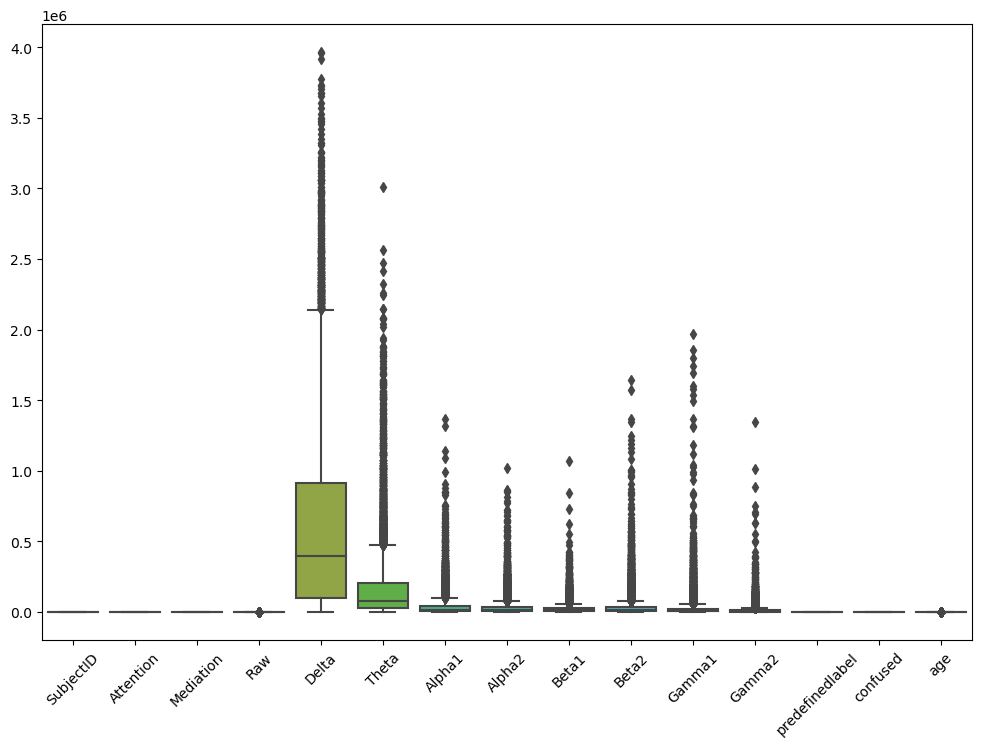

In [13]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
xticks = plt.xticks(rotation=45)
plt.show()

Through the generalized plot, we can see that outliers do exist. In order to avoid the affection on our data analysis and model performance, we handle these outliers in the below step.

Handle Outliers by removing outliers using IQR

/var/folders/_j/60w_4xzd05qcssf5lyt2bp4w0000gn/T/ipykernel_16249/1840639310.py:10: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_cleaned = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]


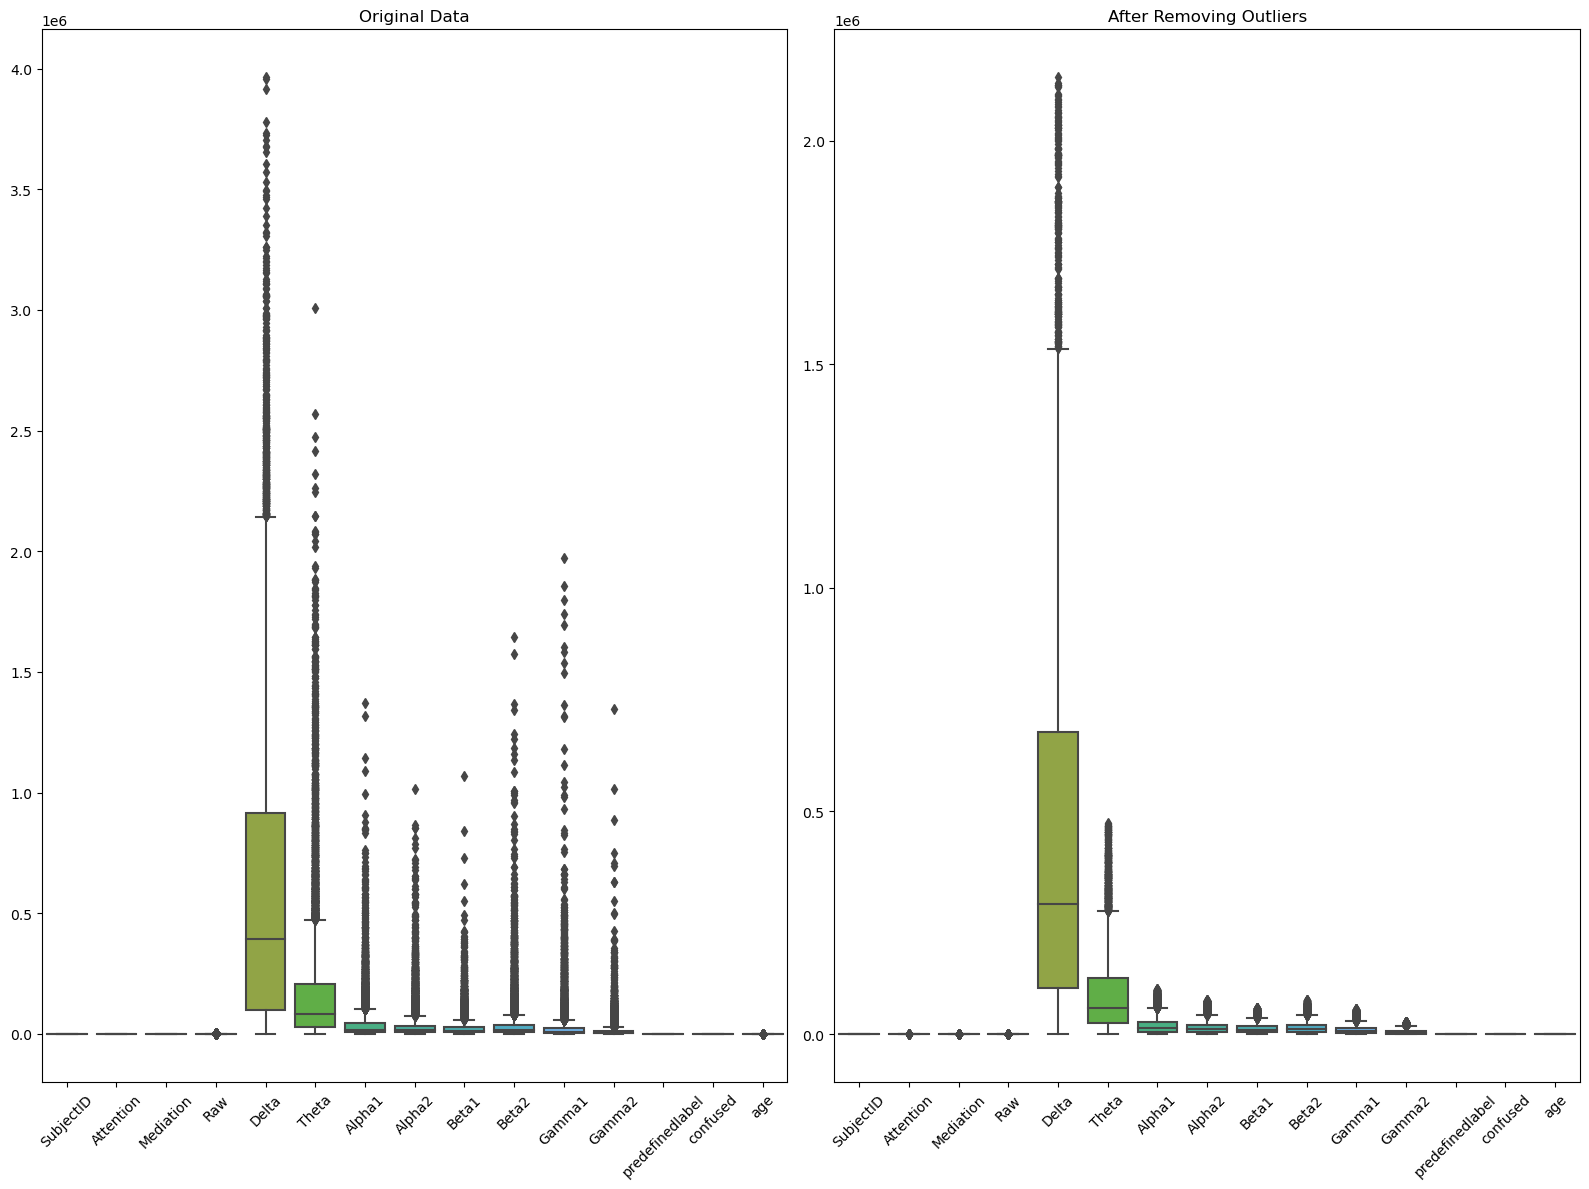

In [14]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# set the lower and upper bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_cleaned = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

# Boxplot before and after removing outliers
plt.figure(figsize=(16, 12))

# Original data boxplot
plt.subplot(1, 2, 1)
sns.boxplot(data=df)
xticks = plt.xticks(rotation=45)
plt.title('Original Data')

# Cleaned data boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=df_cleaned)
xticks = plt.xticks(rotation=45)
plt.title('After Removing Outliers')

plt.tight_layout()
plt.show()

**Key Observations:**

After removing outliers using the IQR method, the cleaned data shows reduced variability and a more compact range in the boxplot compared to the original data. 

This improves the dataset's representativeness by excluding extreme values that could skew analysis or modeling results.

**Feture selection**

Since we want to predict confusion (the 'confused' column, where 1 is confused and 0 is not confused), based on different types of brain waves (Delta, Theta, Alpha, Beta, Gamma), we only preserves 'Delta', 'Theta', 'Alpha1', 'Alpha2', 'Beta1', 'Beta2', 'Gamma1', 'Gamma2', and 'confused' columns.

In [15]:
df_cleaned = df[['Delta', 'Theta', 'Alpha1', 'Alpha2', 'Beta1', 'Beta2', 'Gamma1', 'Gamma2', 'confused']]
df_cleaned

,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,confused
0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0
1,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0
2,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0
3,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0
4,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0
...,...,...,...,...,...,...,...,...,...
12806,127574.0,9951.0,709.0,21732.0,3872.0,39728.0,2598.0,960.0,0
12807,323061.0,797464.0,153171.0,145805.0,39829.0,571280.0,36574.0,10010.0,0
12808,680989.0,154296.0,40068.0,39122.0,10966.0,26975.0,20427.0,2024.0,0
12809,366269.0,27346.0,11444.0,9932.0,1939.0,3283.0,12323.0,1764.0,0


## Discovering Relationship between variables

We first step is to understand the data we will use in the Exploratory Data Analysis, and through drawing the plots of correlations between each pair of variables to discover the relationships between these used variables

We create a histogram to show the frequency distribution of each feature. This helps identify how often values occur across different ranges in the data for each feature.

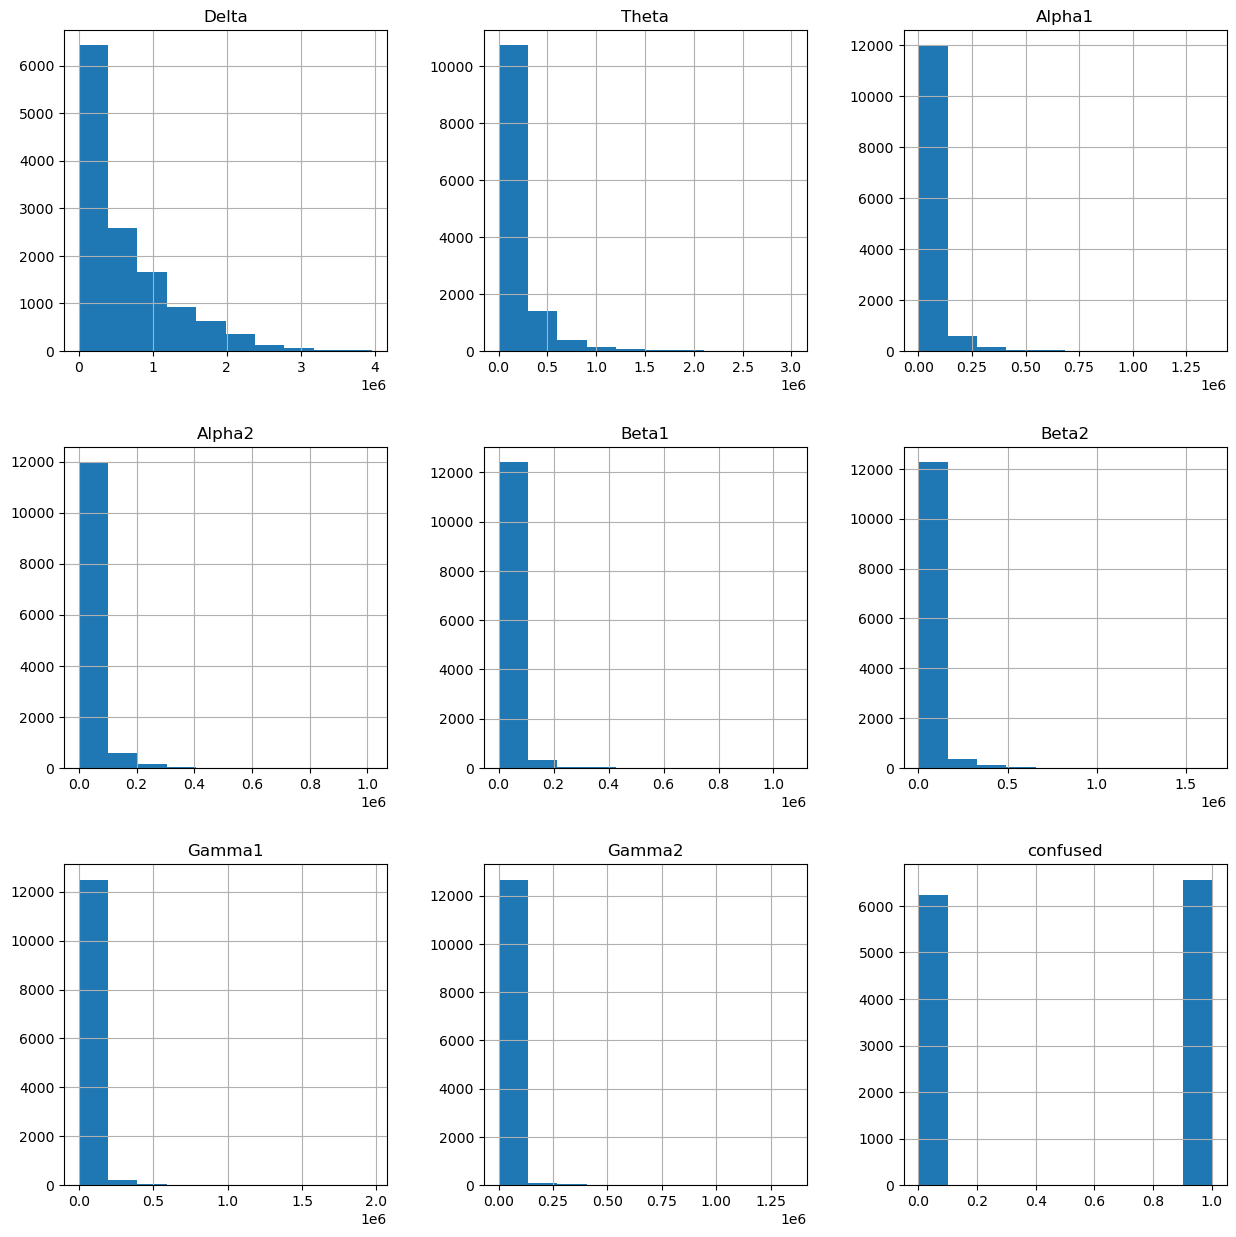

In [16]:
df_cleaned.hist(figsize = (15,15))
plt.show()

# Results

## Exploratory Data Analysis

Carry out whatever EDA you need to for your project.  Because every project will be different we can't really give you much of a template at this point. But please make sure you describe the what and why in text here as well as providing interpretation of results and context.

## First Analysis You Did - Give it a better title

Some more words and stuff.  Remember notebooks work best if you interleave the code that generates a result with properly annotate figures and text that puts these results into context.

In [ ]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

## Second Analysis You Did - Give it a better title

Some more words and stuff.  Remember notebooks work best if you interleave the code that generates a result with properly annotate figures and text that puts these results into context.

In [ ]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

## ETC AD NASEUM

Some more words and stuff.  Remember notebooks work best if you interleave the code that generates a result with properly annotate figures and text that puts these results into context.

In [ ]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

# Ethics & Privacy

- Thoughtful discussion of ethical concerns included
- Ethical concerns consider the whole data science process (question asked, data collected, data being used, the bias in data, analysis, post-analysis, etc.)
- How your group handled bias/ethical concerns clearly described

Acknowledge and address any ethics & privacy related issues of your question(s), proposed dataset(s), and/or analyses. Use the information provided in lecture to guide your group discussion and thinking. If you need further guidance, check out [Deon's Ethics Checklist](http://deon.drivendata.org/#data-science-ethics-checklist). In particular:

- Are there any biases/privacy/terms of use issues with the data you propsed?
- Are there potential biases in your dataset(s), in terms of who it composes, and how it was collected, that may be problematic in terms of it allowing for equitable analysis? (For example, does your data exclude particular populations, or is it likely to reflect particular human biases in a way that could be a problem?)
- How will you set out to detect these specific biases before, during, and after/when communicating your analysis?
- Are there any other issues related to your topic area, data, and/or analyses that are potentially problematic in terms of data privacy and equitable impact?
- How will you handle issues you identified?

# Discusison and Conclusion

Wrap it all up here.  Somewhere between 3 and 10 paragraphs roughly.  A good time to refer back to your Background section and review how this work extended the previous stuff. 


# Team Contributions

Speficy who did what.  This should be pretty granular, perhaps bullet points, no more than a few sentences per person.